In [109]:
# Notebook draws the training data in the pickle file.
import pickle
import matplotlib.pyplot as plt


In [110]:
def plot_agent_feature(one_data):
    agent_size, hist_timestamps, _ = one_data['agent_history_feature'].shape
    agent_size, furt_timestamps, _ = one_data['agent_future_feature'].shape
    valid_agent = 0
    for agent_idx in range(agent_size):
        col = [agent_idx, agent_idx]
        is_valid = False
        for ts in range(hist_timestamps):
            if one_data['agent_history_feature'][agent_idx, ts, 9]:
                plt.scatter(one_data['agent_history_feature'][agent_idx, ts, 0],
                            one_data['agent_history_feature'][agent_idx, ts, 1],
                            c=agent_idx + 1, cmap='magma', s=3)
                is_valid = True
        for ts in range(furt_timestamps):
            if one_data['agent_future_feature'][agent_idx, ts, 3]:
                plt.scatter(one_data['agent_future_feature'][agent_idx, ts, 0],
                            one_data['agent_future_feature'][agent_idx, ts, 1],
                            c=agent_idx + 1, cmap='magma', s=3)
                is_valid = True
        if is_valid:
            valid_agent += 1
    return valid_agent

def plot_map_feature(one_data):
    num_polyline, _ = one_data['map_feature'].shape
    max_dist_to_ego = 0
    for polyline_idx in range(num_polyline):
        if one_data['map_feature'][polyline_idx, 10]:
            plt.scatter(one_data['map_feature'][polyline_idx, 0], 
                        one_data['map_feature'][polyline_idx, 1],
                        c=one_data['map_feature'][polyline_idx, 8],
                        cmap='Blues_r', s=2)
            max_dist_to_ego = max(max_dist_to_ego, one_data['map_feature'][polyline_idx, 6])
    return max_dist_to_ego

In [111]:
pickle_file_path = '/home/willch/Proj/waymo_open_challenage/pickle_files/' + \
    'training/converted_pickle_data-00003-of-01000.pickle'
with open(pickle_file_path, 'rb') as handle:
    converted_data_set = pickle.load(handle)
    

In [112]:
print (len(converted_data_set))
one_data = converted_data_set[1]

466


(-50.0, 50.0)

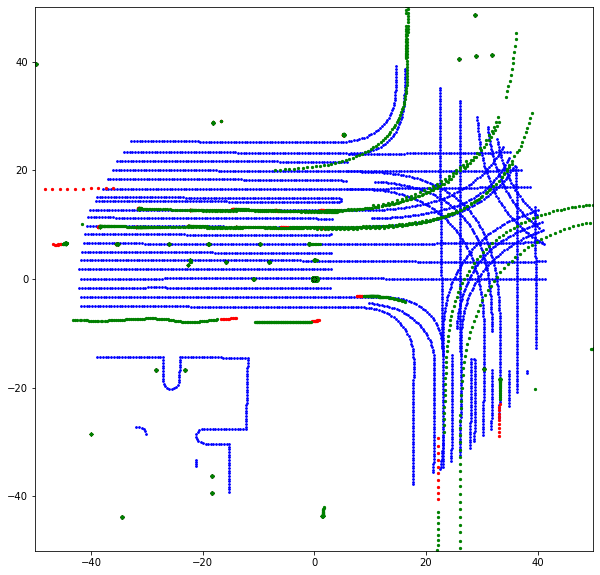

In [108]:
# quick plot of map
fig=plt.figure(figsize=(10, 10))
plt.scatter(one_data['map_feature'][:, 0], one_data['map_feature'][:, 1], s=3, c='b')
plt.scatter(one_data['sdc_history_feature'][:, 0], one_data['sdc_history_feature'][:, 1], c='r')
plt.scatter(one_data['sdc_future_feature'][:, 0], one_data['sdc_future_feature'][:, 1], c='g') 
plt.scatter(one_data['agent_history_feature'][:, :, 0], one_data['agent_history_feature'][:, :, 1], c='r', s=5)
plt.scatter(one_data['agent_future_feature'][:, :, 0], one_data['agent_future_feature'][:, :, 1], c='g', s=5)
plt.xlim([-50, 50])
plt.ylim([-50, 50])

In [114]:
one_data['sdc_future_feature'].shape

(80, 3)

num of valid agent 64
max dist is 41.67938856033282


(-41.67938856033282, 41.67938856033282)

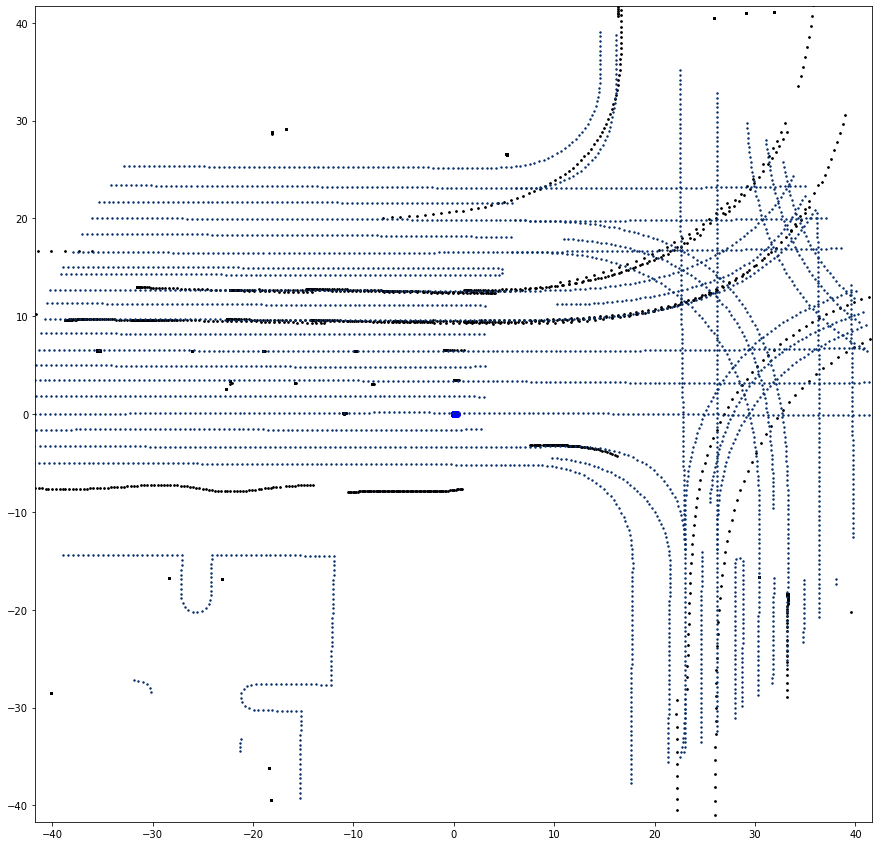

In [101]:
fig=plt.figure(figsize=(15, 15))

plt.scatter(one_data['sdc_history_feature'][:, 0], one_data['sdc_history_feature'][:, 1], c='r')
plt.scatter(one_data['sdc_future_feature'][:, 0], one_data['sdc_future_feature'][:, 1], c='b') 
num_valid_agent = plot_agent_feature(one_data)
max_dist = plot_map_feature(one_data)
print('num of valid agent ' + str(num_valid_agent))
print('max dist is ' + str(max_dist))
plt.xlim([-max_dist, max_dist])
plt.ylim([-max_dist, max_dist])
plt.show()